## **Predicting the Percentage of an Student based on the number of Study Hours**
In this dataset we have 25 tuples of data and 2 attributes are present.From this dataset we are going to infer about the scores obtained when a person studies for 9.5 Hours a day. In this data we are going to use suvervised machine learning model LinearRegression, imported from the Scikit Learn Package.

Data Source = <a>https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv</a>

#### **Column Names**
1. Hours
2. Scores

#### **Model Used**
*LinearRegression* Model of Scikit Learn Package.



##### **Author: Subhajit Saha**


In [40]:
# importing all libraries required in this notebook

In [38]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#importing the data from csv to a Dataframe with which we can work out the computations

In [47]:
study_time = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
study_time.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
#Getting some information about the study_time Dataframe

In [43]:
study_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [44]:
#Analysing some summary statistics about the Data

In [5]:
study_time.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
#Finding out the correlation matrix to analyse the correlation between the two attributes

In [46]:
corr_matrix = study_time.corr().round(2)
corr_matrix

,Hours,Scores
Hours,1.00,0.98
Scores,0.98,1.00


Hours and Scores are highly correlated with a value of 0.98.

#### **Plotting the Scores vs Hours scatter plot to find some relationship about the data**

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

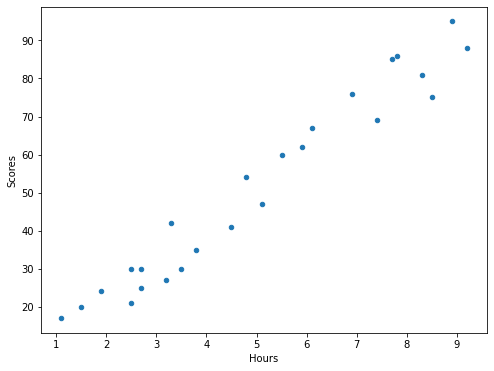

In [15]:
study_time.plot(kind="scatter",
               x="Hours",
               y="Scores",
               figsize=(8,6))

Thus from the above graph we can see a positive linear relation of the Scores with hours.

#### **Preparing the Data**

In [48]:
#Taking out the Hours series and putting it in a 2D Dataframe object

In [49]:
X = study_time[["Hours"]]
print(X.shape)

(25, 1)


In [50]:
#Taking out the Scores series and putting it in a 2D Dataframe object

In [51]:
Y = study_time[["Scores"]]
print(Y.shape)

(25, 1)


y = c + m * x

y --> Scores (Output variable)

x --> Hours (Input variable)

Now that we have our attributes and labels listed above, we are going to split the data into training and testing sets. We will do this with Scikit Learn's built in function train_test_split():

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17, 1)
(8, 1)
(17, 1)
(8, 1)


#### **Training the Algorithm**

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [70]:
print("The intercept of the model is : ",model.intercept_.round(2)[0])
print("The slope of the model is : ",model.coef_.round(2)[0][0])

The intercept of the model is :  -1.51
The slope of the model is :  10.41


#### **Making Predictions**

In [59]:
Y_test_predicted = model.predict(X_test)
Y_test_predicted.shape

(8, 1)

In [71]:
#Plotting the testing data points vs the Prediction in a straight line

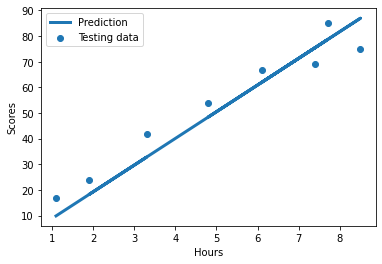

In [64]:
plt.scatter(X_test,Y_test,label="Testing data")
plt.plot(X_test,Y_test_predicted,label="Prediction",linewidth=3)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(loc="upper left")
plt.show()

In [72]:
#Plotting the difference between the testing data and the predicted data points

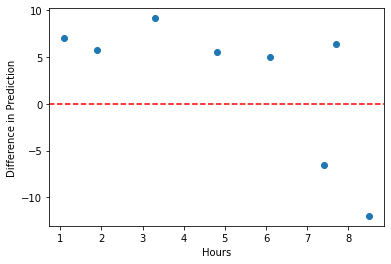

In [74]:
difference = Y_test - Y_test_predicted
plt.scatter(X_test,difference)
plt.axhline(y = 0.0, color = 'r', linestyle = '--')
plt.xlabel('Hours')
plt.ylabel("Difference in Prediction")
plt.show()

#### **Evaluating the model**

In [75]:
print("R squared score of the model : ",model.score(X_test,Y_test))

R squared score of the model :  0.8933827573294114


In [76]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error of the model: ",mean_squared_error(Y_test,Y_test_predicted))

Mean Squared Error of the model:  56.092330905646705


In [77]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error
     (Y_test,Y_test_predicted))

Mean Absolute Error:  7.169048271425507


#### **Testing With an Input Data**

In [80]:
new_data = np.array([9.25]).reshape(-1,1)
print("Predicted Score for the datapoint:",
       model.predict(new_data)[0][0])

Predicted Score for the datapoint: 94.78722212956563
